In [11]:
# file to create graphs and inspect the datasets

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
def load_protein_data(filename):
    
    def read_clean_file(filename):
        with open(filename, "r") as file:
            lines = [line.strip() for line in file 
                     if line.strip() and not line.startswith(('#', '<>', '<end>'))]
        return lines
    
    # Read and clean file
    data = read_clean_file(filename)
    df = pd.DataFrame([line.split() for line in data], columns=['Amino_Acid', 'Structure'])
    df["Structure"] = df["Structure"].replace("_", "c")
    
    # Process sequences
    amino_acids = []
    structures = []
    
    temp_seq = []
    temp_struct = []
    
    for _, row in df.iterrows():
        if row["Amino_Acid"].lower() == "end":
            if temp_seq:
                amino_acids.extend(temp_seq)
                structures.extend(temp_struct)
            temp_seq = []
            temp_struct = []
        else:
            temp_seq.append(row["Amino_Acid"])
            temp_struct.append(row["Structure"])
    
    if temp_seq:
        amino_acids.extend(temp_seq)
        structures.extend(temp_struct)
    
    return pd.DataFrame({"Amino_Acid": amino_acids, "Structure": structures})

In [14]:
train_df = load_protein_data("dataset/protein-secondary-structure.train")
test_df = load_protein_data("dataset/protein-secondary-structure.test")

In [15]:
def plot_distribuation(df, dataset_type):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df['Amino_Acid'], order=df['Amino_Acid'].value_counts().index, palette="coolwarm")
    plt.xlabel("Amino Acid")
    plt.ylabel("Count")
    plt.title(f"Distribution of Amino Acids in {dataset_type}")
    plt.xticks(rotation=45)
    plt.show()

    # Plot Distribution of Secondary Structures
    plt.figure(figsize=(7, 5))
    sns.countplot(x=df['Structure'], order=df['Structure'].value_counts().index, palette="viridis")
    plt.xlabel("Secondary Structure")
    plt.ylabel("Count")
    plt.title(f"Distribution of Amino Acids in {dataset_type}")
    plt.show()

/var/folders/tm/wsywm1lx2db8rljt1jdwbskr0000gn/T/ipykernel_72543/3486053765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Amino_Acid'], order=df['Amino_Acid'].value_counts().index, palette="coolwarm")


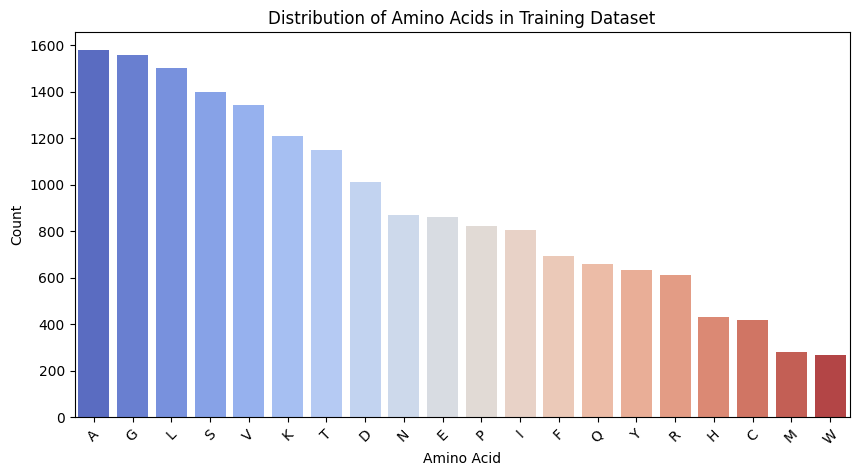

/var/folders/tm/wsywm1lx2db8rljt1jdwbskr0000gn/T/ipykernel_72543/3486053765.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Structure'], order=df['Structure'].value_counts().index, palette="viridis")


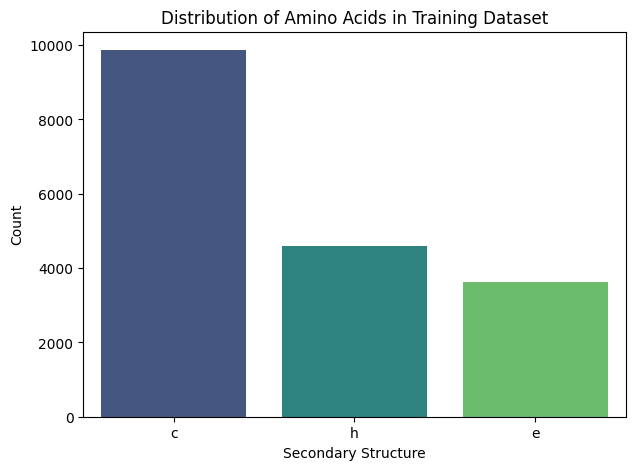

/var/folders/tm/wsywm1lx2db8rljt1jdwbskr0000gn/T/ipykernel_72543/3486053765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Amino_Acid'], order=df['Amino_Acid'].value_counts().index, palette="coolwarm")


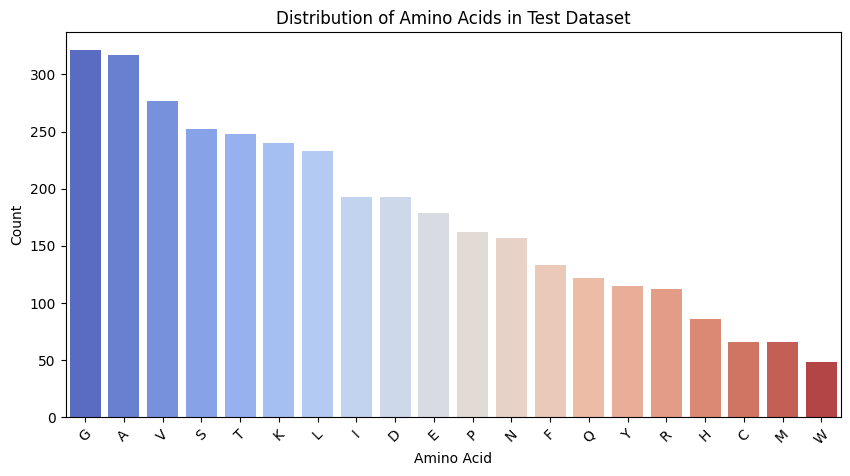

/var/folders/tm/wsywm1lx2db8rljt1jdwbskr0000gn/T/ipykernel_72543/3486053765.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Structure'], order=df['Structure'].value_counts().index, palette="viridis")


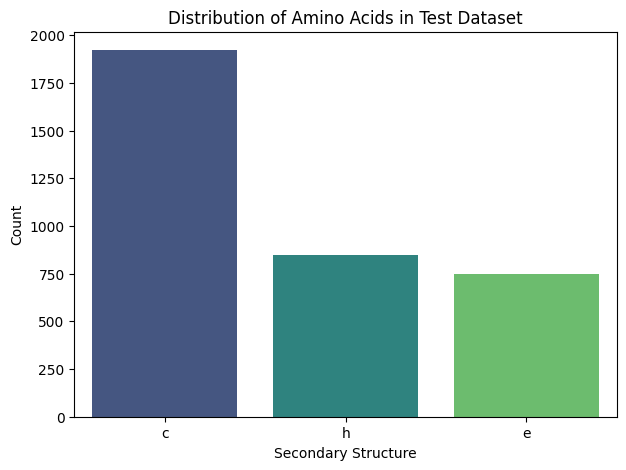

In [16]:
plot_distribuation(train_df, "Training Dataset")
plot_distribuation(test_df, "Test Dataset")

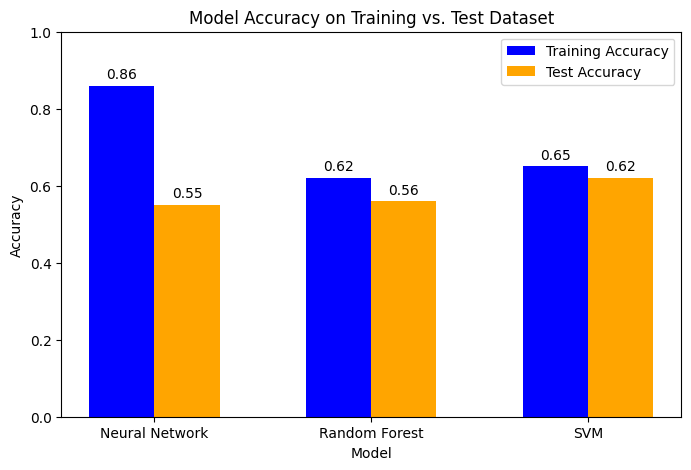

In [17]:
def show_accuracy(nn_train, nn_test, rf_train, rf_test, svm_train, svm_test,):
    # Example accuracy values (replace these with your actual results)
    models = ['Neural Network', 'Random Forest', 'SVM']
    train_accuracy = [nn_train, rf_train, svm_train]  # Training accuracy for each model
    test_accuracy = [nn_test, rf_test, svm_test]   # Test accuracy for each model

    # Setting up the plot
    x = np.arange(len(models))  # Label locations
    width = 0.3  # Width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Plot bars for training and test accuracy
    bars1 = ax.bar(x - width/2, train_accuracy, width, label='Training Accuracy', color='blue')
    bars2 = ax.bar(x + width/2, test_accuracy, width, label='Test Accuracy', color='orange')

    # Labels and formatting
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title('Model Accuracy on Training vs. Test Dataset')
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylim(0, 1)
    ax.legend()

    # Annotate bars with accuracy values
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.show()

show_accuracy(0.86, 0.55, 0.62, 0.56, 0.65, 0.62)